<a href="https://colab.research.google.com/github/yuji-sgs/Inverse_Analytics/blob/main/Multiple_Inverse_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata

import io
from google.colab import files

import tensorflow as tf
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import Adam
# from keras.layers.core import Dropout
from keras.callbacks import EarlyStopping, LearningRateScheduler
from keras.models import Model
from keras.layers import Input, Dense

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score

In [ ]:
# データのアップロード
uploaded = files.upload()

Saving data.csv to data.csv


# データ処理

In [ ]:
# データフレームの読み込み・確認
df = pd.read_csv(io.BytesIO(uploaded['data.csv']))
df

,C2,s,w11_max,BandGap1
0,0.15,0.01,250.00,6.689500e+00
1,0.30,0.01,353.55,5.649800e+00
2,0.45,0.01,433.01,4.264400e+00
3,0.60,0.01,500.00,2.945800e+00
4,0.75,0.01,559.02,1.748300e+00
...,...,...,...,...
9995,14.40,1.00,645.50,4.090000e-12
9996,14.55,1.00,645.50,7.840000e-12
9997,14.70,1.00,645.50,2.270000e-13
9998,14.85,1.00,645.50,4.550000e-12


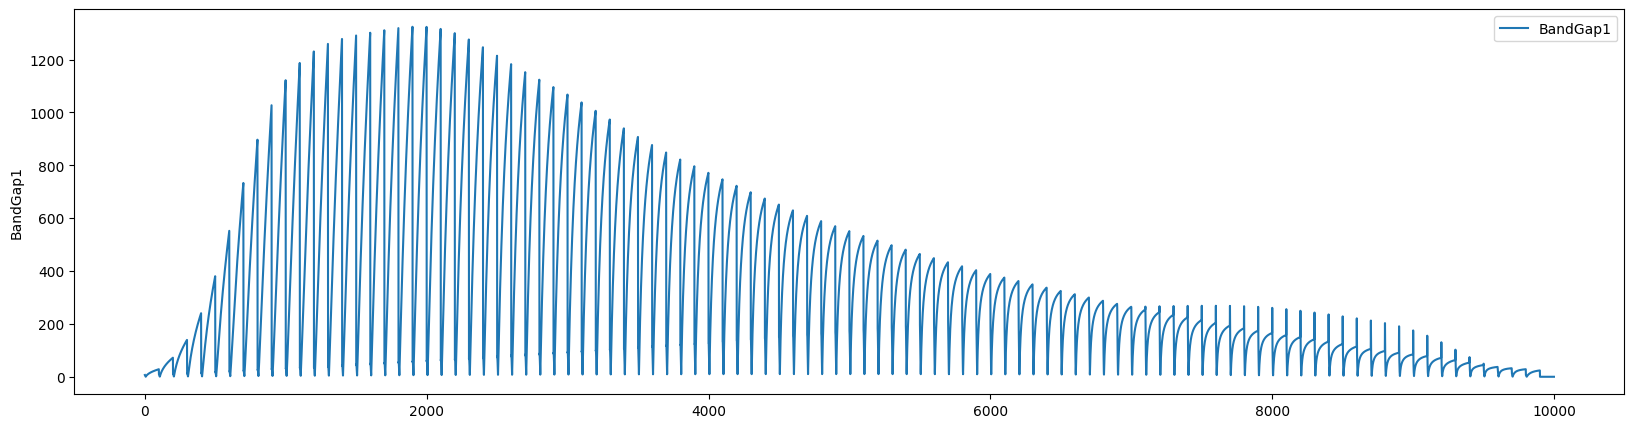

In [ ]:
# データの確認
df.plot(y='BandGap1', figsize=(20, 5))
plt.ylabel('BandGap1')
plt.show()

In [ ]:
# データの分割
(train, test) = train_test_split(df, test_size=0.2, shuffle=True)

# x_train, x_testではcsvファイルの1行目から２行目を， y_train, y_testでは3, 4行目のデータを活用
x_train = train.iloc[:, [0, 1]]
y_train = train.iloc[:, [2, 3]]

x_test = test.iloc[:, [0, 1]]
y_test = test.iloc[:, [2, 3]]

# モデル構築

In [ ]:
# モデルの構築
# inputの数:c2, s
inputs = Input(shape=(2,))

# 学習回数
epochs = 150
batch_size = 64

# ノード数
node = 64

x1 = Dense(node, activation='relu')(inputs)
x2 = Dense(node, activation='relu')(x1)
x3 = Dense(node, activation='relu')(x2)


x4 = Dense(node, activation='relu')(x3) # アウトプット直前の層
output1 = Dense(1, name='output1')(x4)

x5 = Dense(node, activation='relu')(x3) # アウトプット直前の層
output2 = Dense(1, name='output2')(x5)

model = Model(inputs=inputs, outputs=[output1, output2])

optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999)
model.compile(
    optimizer=optimizer,
    loss=['mse', 'mse']
)

# 学習

In [ ]:
# 学習オプション
history = model.fit(x_train,
                    {"output1":y_train.iloc[:, [0]], "output2":y_train.iloc[:, [1]]},
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_data=(x_test, {"output1":y_test.iloc[:, [0]], "output2":y_test.iloc[:, [1]]})
)

Epoch 1/150
125/125 [==============================] - 2s 5ms/step - loss: 528343.5000 - output1_loss: 392636.3750 - output2_loss: 135707.1406 - val_loss: 224440.5000 - val_output1_loss: 147937.3594 - val_output2_loss: 76503.1406
Epoch 2/150
125/125 [==============================] - 0s 3ms/step - loss: 219527.6875 - output1_loss: 139531.4219 - output2_loss: 79996.2188 - val_loss: 188536.3438 - val_output1_loss: 109745.0156 - val_output2_loss: 78791.3438
Epoch 3/150
125/125 [==============================] - 0s 3ms/step - loss: 183698.9375 - output1_loss: 102525.7578 - output2_loss: 81173.2188 - val_loss: 158043.1562 - val_output1_loss: 80202.5156 - val_output2_loss: 77840.6484
Epoch 4/150
125/125 [==============================] - 0s 3ms/step - loss: 145758.6250 - output1_loss: 69547.2734 - output2_loss: 76211.3594 - val_loss: 115354.7656 - val_output1_loss: 47772.7969 - val_output2_loss: 67581.9844
Epoch 5/150
125/125 [==============================] - 0s 2ms/step - loss: 110984.3906

In [ ]:
# 構築したモデルで予測
pred1, pred2 = model.predict(x_test)

63/63 [==============================] - 0s 1ms/step


# 精度評価

In [ ]:
#精度評価指標
# Output1 ====================================================================
print("=======  Output1  =======")
# MAE
test_MAE = mean_absolute_error(y_test.iloc[:, 0], pred1)
print('MAE：', test_MAE)

# RMSE
test_RMSE = sqrt(mean_squared_error(y_test.iloc[:, 0], pred1))
print('RMSE：', test_RMSE)

# 決定係数
R2 = r2_score(y_test.iloc[:, 0], pred1)
print('R2：', R2)

print("")

# Output2 ====================================================================
print("=======  Output2  =======")
# MAE
test_MAE = mean_absolute_error(y_test.iloc[:, 1], pred2)
print('MAE：', test_MAE)

# RMSE
test_RMSE = sqrt(mean_squared_error(y_test.iloc[:, 1], pred2))
print('RMSE：', test_RMSE)

# 決定係数
R2 = r2_score(y_test.iloc[:, 1], pred2)
print('R2：', R2)

=======  Output1  =======
MAE： 6.688226742248535
RMSE： 9.71768157160142
R2： 0.9986914555012966

=======  Output2  =======
MAE： 10.425715373523913
RMSE： 17.15523131427355
R2： 0.9970080764560787


Text(0, 0.5, 'loss')

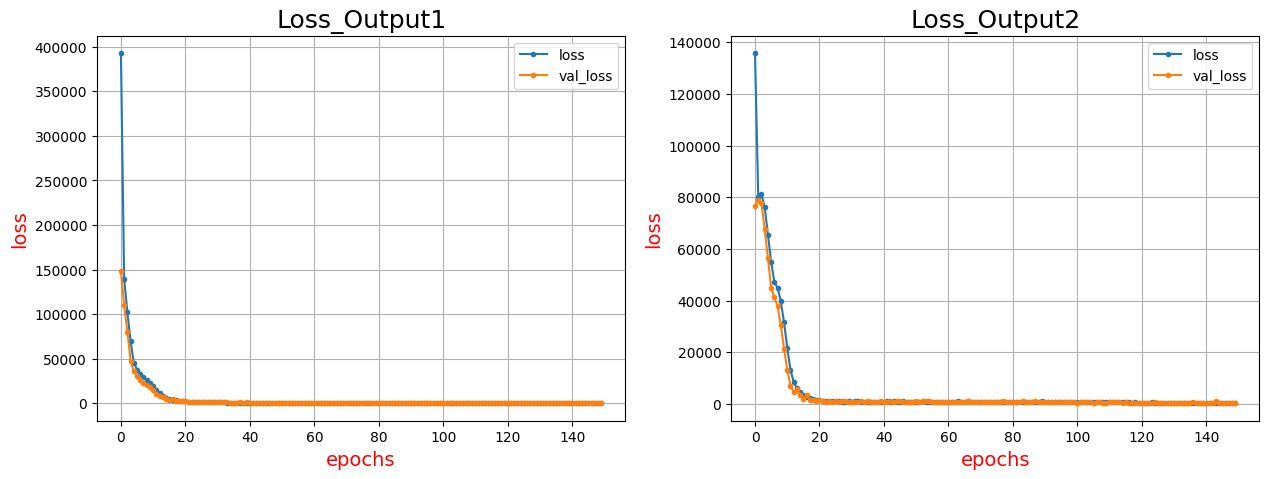

In [ ]:
# Figureを追加
fig = plt.figure(figsize = (15, 5))

# Output1 ====================================================================
# 1×2 の1枚目に描画する
loss_graph1 = fig.add_subplot(1, 2, 1)

# x,yに要素追加
loss1 = history.history['output1_loss']
val_loss1 = history.history['val_output1_loss']
epochs1 = len(loss1)

# グラフ設定
loss_graph1.plot(range(epochs), loss1, marker='.', label='loss')
loss_graph1.plot(range(epochs), val_loss1, marker='.', label='val_loss')
loss_graph1.set_title("Loss_Output1", size = 18)
loss_graph1.legend(loc='best')
loss_graph1.grid()
loss_graph1.set_xlabel("epochs", size = 14, color = "r")
loss_graph1.set_ylabel("loss", size = 14, color = "r")

#==============================================================================
# Output2 ====================================================================
# 1×2 の2枚目に描画する
loss_graph2 = fig.add_subplot(1, 2, 2)

# x,yに要素追加
loss2 = history.history['output2_loss']
val_loss2 = history.history['val_output2_loss']
epochs2 = len(loss2)

# グラフ設定
loss_graph2.plot(range(epochs), loss2, marker='.', label='loss')
loss_graph2.plot(range(epochs), val_loss2, marker='.', label='val_loss')
loss_graph2.set_title("Loss_Output2", size = 18)
loss_graph2.legend(loc='best')
loss_graph2.grid()
loss_graph2.set_xlabel("epochs", size = 14, color = "r")
loss_graph2.set_ylabel("loss", size = 14, color = "r")
#==============================================================================

Text(0, 0.5, 'predicted_data')

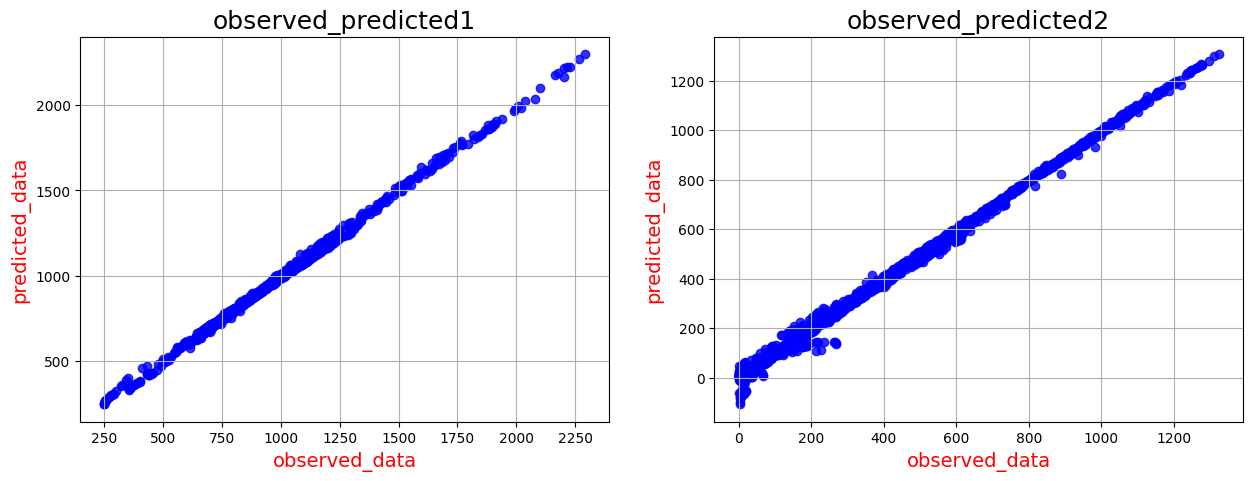

In [ ]:
# Observed-Predicted Plot
# Figureを追加
fig = plt.figure(figsize = (15, 5))

# Output1 ====================================================================
# 1×2 の1枚目に描画する
yy1 = fig.add_subplot(1, 2, 1)

yy1.scatter(y_test.iloc[:, 0], pred1, c='blue', alpha=0.8)

# グラフ設定
yy1.set_title("observed_predicted1", size = 18)
yy1.grid()
yy1.set_xlabel("observed_data", size = 14, color = "r")
yy1.set_ylabel("predicted_data", size = 14, color = "r")

# Output2 ====================================================================
# 1×2 の2枚目に描画する
yy2 = fig.add_subplot(1, 2, 2)

yy2.scatter(y_test.iloc[:, 1], pred2, c='blue', alpha=0.8)

# グラフ設定
yy2.set_title("observed_predicted2", size = 18)
yy2.grid()
yy2.set_xlabel("observed_data", size = 14, color = "r")
yy2.set_ylabel("predicted_data", size = 14, color = "r")

# 逆解析プログラム

In [ ]:
# 逆解析プログラム（勾配降下法　｜並列）
# 所望値を定数で設定
target_w11_max = tf.constant([1000.0], dtype=tf.float32)
target_BandGap1 = tf.constant([1000.0], dtype=tf.float32)

# 初期の入力値をランダムに1つ設定（c2は0から15の範囲、sは0から1の範囲に制限）
c2 = tf.Variable(tf.random.uniform([1], 0, 15))
s = tf.Variable(tf.random.uniform([1], 0, 1))

# 最適化手法を定義
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)

# 各値を保存するリスト
c2_values = []
s_values = []
predicted_w11_max_values = []
predicted_BandGap1_values = []

# 損失関数の値を保存するリスト
loss1_values = []
loss2_values = []

# 学習回数
step = 1000

# 学習を実行
for step in range(step):
    # loss1に対する最適化
    with tf.GradientTape() as tape1:
        tape1.watch([c2, s])
        predicted_w11_max = model(tf.stack([c2, s], axis=1))[0]
        loss1 = tf.reduce_mean(tf.square(predicted_w11_max - target_w11_max))

    gradients1 = tape1.gradient(loss1, [c2, s])
    optimizer.apply_gradients(zip(gradients1, [c2, s]))

    # loss2に対する最適化
    with tf.GradientTape() as tape2:
        tape2.watch([c2, s])
        predicted_BandGap1 = model(tf.stack([c2, s], axis=1))[1]
        loss2 = tf.reduce_mean(tf.square(predicted_BandGap1 - target_BandGap1))

    gradients2 = tape2.gradient(loss2, [c2, s])
    optimizer.apply_gradients(zip(gradients2, [c2, s]))

    # 各値を保存
    c2_values.append(c2.numpy()[0])
    s_values.append(s.numpy()[0])
    predicted_w11_max_values.append(predicted_w11_max.numpy()[0])
    predicted_BandGap1_values.append(predicted_BandGap1.numpy()[0])

    # 損失関数の値を保存
    loss1_values.append(loss1.numpy())
    loss2_values.append(loss2.numpy())

    # 10ステップごとに結果を出力
    if step % 10 == 0:
        print(f'Epoch: {step}, Loss1: {loss1.numpy()}, Loss2: {loss2.numpy()}, c2: {c2.numpy()}, s: {s.numpy()}')

# 最終的な学習結果を出力(c2とsのパラメータ)
print(f'Loss1: {loss1.numpy()}, Loss2: {loss2.numpy()}, c2: {c2.numpy()}, s: {s.numpy()}')

Epoch: 0, Loss1: 124177.2578125, Loss2: 923495.75, c2: [6.630133], s: [0.9332345]
Epoch: 10, Loss1: 117257.96875, Loss2: 739607.125, c2: [6.79116], s: [0.78534883]
Epoch: 20, Loss1: 106663.1171875, Loss2: 519049.71875, c2: [6.9517274], s: [0.6294863]
Epoch: 30, Loss1: 83663.515625, Loss2: 278419.5, c2: [7.131749], s: [0.46676618]
Epoch: 40, Loss1: 32990.72265625, Loss2: 82673.4140625, c2: [7.3155246], s: [0.30465794]
Epoch: 50, Loss1: 3012.552001953125, Loss2: 53123.2734375, c2: [7.512777], s: [0.21173601]
Epoch: 60, Loss1: 1439.564208984375, Loss2: 47182.9765625, c2: [7.715625], s: [0.20553033]
Epoch: 70, Loss1: 2362.366943359375, Loss2: 38632.6171875, c2: [7.893507], s: [0.20962943]
Epoch: 80, Loss1: 2150.68603515625, Loss2: 33338.8515625, c2: [8.051893], s: [0.2084459]
Epoch: 90, Loss1: 2011.8597412109375, Loss2: 28860.66796875, c2: [8.197302], s: [0.20792134]
Epoch: 100, Loss1: 1932.0059814453125, Loss2: 25144.17578125, c2: [8.330256], s: [0.2072002]
Epoch: 110, Loss1: 1699.2067871

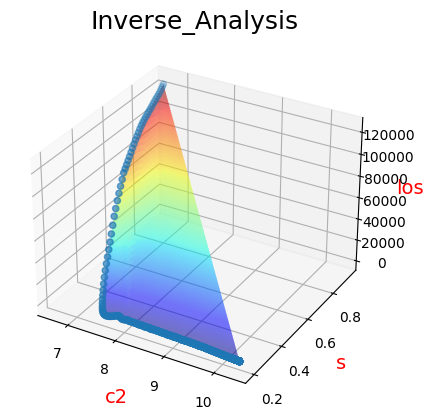

In [ ]:
# x,y,zに要素追加
x = np.array(c2_values)
y = np.array(s_values)
z = np.array(loss1_values)  # lossをリスト形式に変換

# 配列の形状を確認
assert x.shape == y.shape == z.shape, "Shape mismatch!"

# scipy.interpolate.griddata() でサンプリングしなおす
x_new, y_new = np.meshgrid(np.linspace(x.min(), x.max(), len(x)), np.linspace(y.min(), y.max(), len(y)))
z_new = griddata((x, y), z, (x_new, y_new), method='linear')

# Figureを追加
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# Axesのタイトルを設定
ax.set_title("Inverse_Analysis", size = 18)
# 軸ラベルを設定
ax.set_xlabel("c2", size = 14, color = "r")
ax.set_ylabel("s", size = 14, color = "r")
ax.set_zlabel("loss", size = 14, color = "r")
ax.plot_surface(x_new, y_new, z_new, rstride=1, cstride=10, cmap='jet', alpha=0.7)
ax.scatter(c2_values, s_values, loss1_values)
plt.show()

In [ ]:
# 逆解析プログラム
# 所望値を定数で設定
target_w11_max = tf.constant([500.0], dtype=tf.float32)
target_BandGap1 = tf.constant([1000.0], dtype=tf.float32)

# 初期の入力値をランダムに1つ設定（c2は0から15の範囲、sは0から1の範囲に制限）
c2 = tf.Variable(tf.random.uniform([1], 0, 15))
s = tf.Variable(tf.random.uniform([1], 0, 1))

# 最適化手法を定義
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)

# 各値を保存するリスト
c2_values = []
s_values = []
predicted_w11_max_values = []
predicted_BandGap1_values = []

# 損失関数の値を保存するリスト
loss1_values = []
loss2_values = []

# 学習回数
step = 1000

# 学習を実行
for step in range(step):
    # loss1に対する最適化
    with tf.GradientTape() as tape1:
        tape1.watch([c2, s])
        predicted_w11_max = model(tf.stack([c2, s], axis=1))[0]
        loss1 = tf.reduce_mean(tf.square(predicted_w11_max - target_w11_max))

    gradients1 = tape1.gradient(loss1, [c2, s])
    optimizer.apply_gradients(zip(gradients1, [c2, s]))

    # loss2に対する最適化
    with tf.GradientTape() as tape2:
        tape2.watch([c2, s])
        predicted_BandGap1 = model(tf.stack([c2, s], axis=1))[1]
        loss2 = tf.reduce_mean(tf.square(predicted_BandGap1 - target_BandGap1))

    gradients2 = tape2.gradient(loss2, [c2, s])
    optimizer.apply_gradients(zip(gradients2, [c2, s]))

    # 各値を保存
    c2_values.append(c2.numpy()[0])
    s_values.append(s.numpy()[0])
    predicted_w11_max_values.append(predicted_w11_max.numpy()[0])
    predicted_BandGap1_values.append(predicted_BandGap1.numpy()[0])

    # 損失関数の値を保存
    loss1_values.append(loss1.numpy())
    loss2_values.append(loss2.numpy())

    # 10ステップごとに結果を出力
    if step % 10 == 0:
        print(f'Epoch: {step}, Loss1: {loss1.numpy()}, Loss2: {loss2.numpy()}, c2: {c2.numpy()}, s: {s.numpy()}')

# 最終的な学習結果を出力(c2とsのパラメータ)
print(f'Loss1: {loss1.numpy()}, Loss2: {loss2.numpy()}, c2: {c2.numpy()}, s: {s.numpy()}')

Epoch: 0, Loss1: 24291.859375, Loss2: 795896.0625, c2: [9.118029], s: [0.852486]
Epoch: 10, Loss1: 27299.67578125, Loss2: 594269.9375, c2: [9.022968], s: [0.7131979]
Epoch: 20, Loss1: 34402.484375, Loss2: 387099.28125, c2: [8.987237], s: [0.5725884]
Epoch: 30, Loss1: 54455.31640625, Loss2: 176674.96875, c2: [9.130937], s: [0.43801206]
Epoch: 40, Loss1: 85515.125, Loss2: 57427.71875, c2: [9.304367], s: [0.33677712]
Epoch: 50, Loss1: 109135.625, Loss2: 30859.87890625, c2: [9.458588], s: [0.3073577]
Epoch: 60, Loss1: 106018.2421875, Loss2: 31639.798828125, c2: [9.59641], s: [0.31356198]
Epoch: 70, Loss1: 99895.4296875, Loss2: 34673.96875, c2: [9.732851], s: [0.32237086]
Epoch: 80, Loss1: 96436.9765625, Loss2: 35326.62890625, c2: [9.872102], s: [0.32750192]
Epoch: 90, Loss1: 94610.2734375, Loss2: 34287.42578125, c2: [10.009555], s: [0.32937944]
Epoch: 100, Loss1: 96039.578125, Loss2: 30882.376953125, c2: [10.137131], s: [0.32795867]
Epoch: 110, Loss1: 97674.0625, Loss2: 27481.318359375, c2

# 加重平均法

In [ ]:
# 逆解析プログラム（加重平均法）
# 所望値を定数で設定
target_w11_max = tf.constant([1000.0], dtype=tf.float32)
target_BandGap1 = tf.constant([1000.0], dtype=tf.float32)

# 重み（ハイパーパラメータ）
alpha = 0.7

# 初期の入力値をランダムに1つ設定（c2は0から15の範囲、sは0から1の範囲に制限）
c2 = tf.Variable(tf.random.uniform([1], 0, 15))
s = tf.Variable(tf.random.uniform([1], 0, 1))

# 最適化手法を定義
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)

# 各値を保存するリスト
c2_values = []
s_values = []
predicted_w11_max_values = []
predicted_BandGap1_values = []

# 損失関数の値を保存するリスト
loss1_values = []
loss2_values = []

# 学習回数
step = 1000

# 学習を実行
for step in range(step):
    # loss1に対する最適化
    with tf.GradientTape() as tape:
        predicted = model(tf.stack([c2, s], axis=1))
        predicted_w11_max = predicted[0]
        predicted_BandGap1 = predicted[1]
        loss1 = tf.reduce_mean(tf.square(predicted_w11_max - target_w11_max))
        loss2 = tf.reduce_mean(tf.square(predicted_BandGap1 - target_BandGap1))
        total_loss = alpha * loss1 + (1 - alpha) * loss2

    gradients = tape.gradient(total_loss, [c2, s])
    optimizer.apply_gradients(zip(gradients, [c2, s]))


    # 各値を保存
    c2_values.append(c2.numpy()[0])
    s_values.append(s.numpy()[0])
    predicted_w11_max_values.append(predicted_w11_max.numpy()[0])
    predicted_BandGap1_values.append(predicted_BandGap1.numpy()[0])

    # 損失関数の値を保存
    loss1_values.append(loss1.numpy())
    loss2_values.append(loss2.numpy())

    # 10ステップごとに結果を出力
    if step % 10 == 0:
        print(f'Epoch: {step}, Loss1: {loss1.numpy()}, Loss2: {loss2.numpy()}, c2: {c2.numpy()}, s: {s.numpy()}')

# 最終的な学習結果を出力(c2とsのパラメータ)
print(f'Loss1: {loss1.numpy()}, Loss2: {loss2.numpy()}, c2: {c2.numpy()}, s: {s.numpy()}')

Epoch: 0, Loss1: 11.03744888305664, Loss2: 27998.599609375, c2: [8.686694], s: [0.18364435]
Epoch: 10, Loss1: 849.85205078125, Loss2: 18538.5078125, c2: [8.784144], s: [0.18704616]
Epoch: 20, Loss1: 1681.7158203125, Loss2: 14106.78125, c2: [8.883862], s: [0.19636932]
Epoch: 30, Loss1: 781.7218627929688, Loss2: 13954.87109375, c2: [8.980279], s: [0.18804698]
Epoch: 40, Loss1: 1185.7354736328125, Loss2: 10972.728515625, c2: [9.074993], s: [0.19185166]
Epoch: 50, Loss1: 677.997802734375, Loss2: 10313.875, c2: [9.165951], s: [0.18779574]
Epoch: 60, Loss1: 740.3985595703125, Loss2: 8525.41796875, c2: [9.253755], s: [0.18780796]
Epoch: 70, Loss1: 597.10791015625, Loss2: 7440.810546875, c2: [9.337215], s: [0.18612961]
Epoch: 80, Loss1: 238.82736206054688, Loss2: 7288.74462890625, c2: [9.415383], s: [0.18447159]
Epoch: 90, Loss1: 489.1321716308594, Loss2: 5511.39501953125, c2: [9.48952], s: [0.18629007]
Epoch: 100, Loss1: 261.343994140625, Loss2: 5079.74609375, c2: [9.559824], s: [0.18513732]
